In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타깃 변수
y = df['blueWins']

# 피처 변수
X = df.drop(columns=['blueWins', 'gameId'])

# 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 분포 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_lambda': uniform(1, 10),
    'reg_alpha': uniform(0, 5)
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Randomized Search 초기화
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# 모델 학습
import time
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {random_search.best_params_}')

# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 최적 모델 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'colsample_bytree': 0.6057573954519023, 'gamma': 0.03482179215207487, 'learning_rate': 0.01920052840435055, 'max_depth': 3, 'n_estimators': 193, 'reg_alpha': 4.277302920055036, 'reg_lambda': 8.036578593800236, 'subsample': 0.78966953163493}
Best model accuracy: 0.7267
Total time taken: 109.50 seconds


<Figure size 1000x600 with 0 Axes>

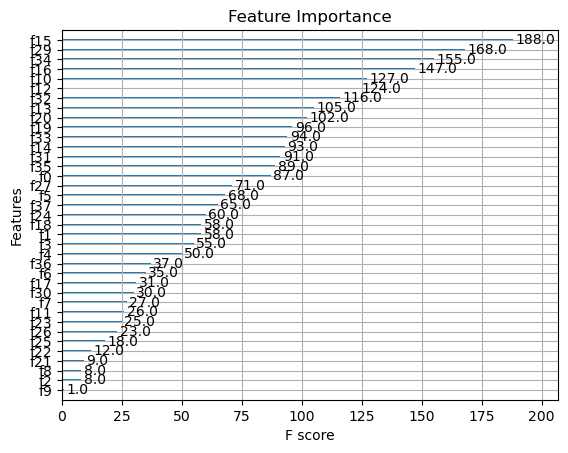

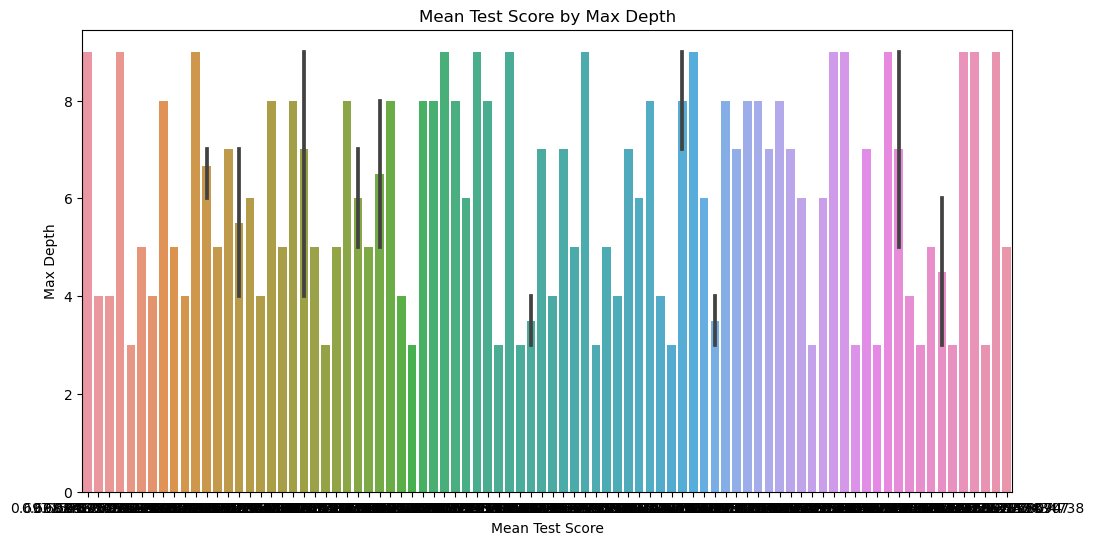

c:\Users\NT551\anaconda3\envs\project\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


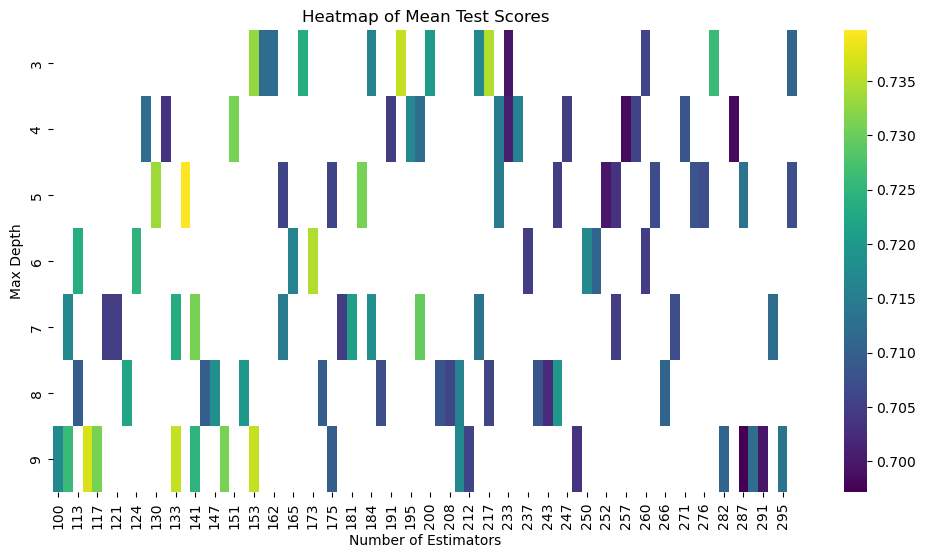

In [4]:
# 하이퍼파라미터 중요도 시각화
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

# RandomizedSearchCV 결과 시각화
results = random_search.cv_results_
results_df = pd.DataFrame(results)

# 하이퍼파라미터 최적값 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='mean_test_score', y='param_max_depth', data=results_df)
plt.title('Mean Test Score by Max Depth')
plt.xlabel('Mean Test Score')
plt.ylabel('Max Depth')
plt.show()

# 하이퍼파라미터 조합에 따른 성능 heatmap 시각화
plt.figure(figsize=(12, 6))
heatmap_data = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of Mean Test Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
import time

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타깃 변수
y = df['blueWins']

# 피처 변수
X = df.drop(columns=['blueWins', 'gameId'])

# 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 분포 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_lambda': uniform(1, 10),
    'reg_alpha': uniform(0, 5),
    'objective': ['binary:logistic'],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'scale_pos_weight': uniform(1, 10)  # 예시로 1에서 10까지의 범위 설정
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(eval_metric='logloss')

# Randomized Search 초기화
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# 모델 학습
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {random_search.best_params_}')

# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 최적 모델 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')


In [ ]:
# 에폭 확인 및 과적합 코드 추가

import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리: DMatrix로 변환
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# 하이퍼파라미터 분포 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_lambda': uniform(1, 10),
    'reg_alpha': uniform(0, 5)
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Randomized Search 초기화
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42,
    refit=True
)

# 모델 학습
import time
start_time = time.time()
random_search.fit(X_train, y_train, 
                  eval_set=[(X_valid, y_valid)], 
                  early_stopping_rounds=10, 
                  eval_metric='logloss',
                  verbose=True)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {random_search.best_params_}')

# 각 후보 모델의 성능 추적
results = random_search.cv_results_

# 각 하이퍼파라미터 조합의 성능 시각화
plt.figure(figsize=(14, 7))
for i, params in enumerate(results['params']):
    model = xgb.XGBClassifier(**params, objective='binary:logistic', eval_metric='logloss')
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)
    evals_result = model.evals_result()
    
    plt.plot(evals_result['validation_0']['logloss'], label=f'Params {i}')

plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('Logloss over Epochs for Different Hyperparameter Combinations')
plt.legend()
plt.show()

# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True)
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[0]	validation_0-logloss:0.68834
[1]	validation_0-logloss:0.68371
[2]	validation_0-logloss:0.67922
[3]	validation_0-logloss:0.67478
[4]	validation_0-logloss:0.67063
[5]	validation_0-logloss:0.66659
[6]	validation_0-logloss:0.66259
[7]	validation_0-logloss:0.65887
[8]	validation_0-logloss:0.65535
[9]	validation_0-logloss:0.65185
[10]	validation_0-logloss:0.64843
[11]	validation_0-logloss:0.64508
[12]	validation_0-logloss:0.64179
[13]	validation_0-logloss:0.63874
[14]	validation_0-logloss:0.63574
[15]	validation_0-logloss:0.63285
[16]	validation_0-logloss:0.62998
[17]	validation_0-logloss:0.62721
[18]	validation_0-logloss:0.62455
[19]	validation_0-logloss:0.62195
[20]	validation_0-logloss:0.61930
[21]	validation_0-logloss:0.61685
[22]	validation_0-logloss:0.61451
[23]	validation_0-logloss:0.61210
[24]	validation_0-logloss:0.60992
[25]	validation_0-logloss:0.60784
[26]	validation_0-logloss:0.60577
[27]	validation_0-logloss:0.6

c:\Users\NT551\anaconda3\envs\project\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.58295
[40]	validation_0-logloss:0.58151
[41]	validation_0-logloss:0.58015
[42]	validation_0-logloss:0.57881
[43]	validation_0-logloss:0.57755
[44]	validation_0-logloss:0.57621
[45]	validation_0-logloss:0.57497
[46]	validation_0-logloss:0.57373
[47]	validation_0-logloss:0.57256
[48]	validation_0-logloss:0.57149
[49]	validation_0-logloss:0.57037
[50]	validation_0-logloss:0.56936
[51]	validation_0-logloss:0.56829
[52]	validation_0-logloss:0.56721
[53]	validation_0-logloss:0.56622
[54]	validation_0-logloss:0.56522
[55]	validation_0-logloss:0.56421
[56]	validation_0-logloss:0.56327
[57]	validation_0-logloss:0.56235
[58]	validation_0-logloss:0.56134
[59]	validation_0-logloss:0.56046
[60]	validation_0-logloss:0.55956
[61]	validation_0-logloss:0.55881
[62]	validation_0-logloss:0.55793
[63]	validation_0-logloss:0.55713
[64]	validation_0-logloss:0.55641
[65]	validation_0-logloss:0.55571
[66]	validation_0-logloss:0.55502
[67]	validation_0-logloss:0.55437
[68]	validatio

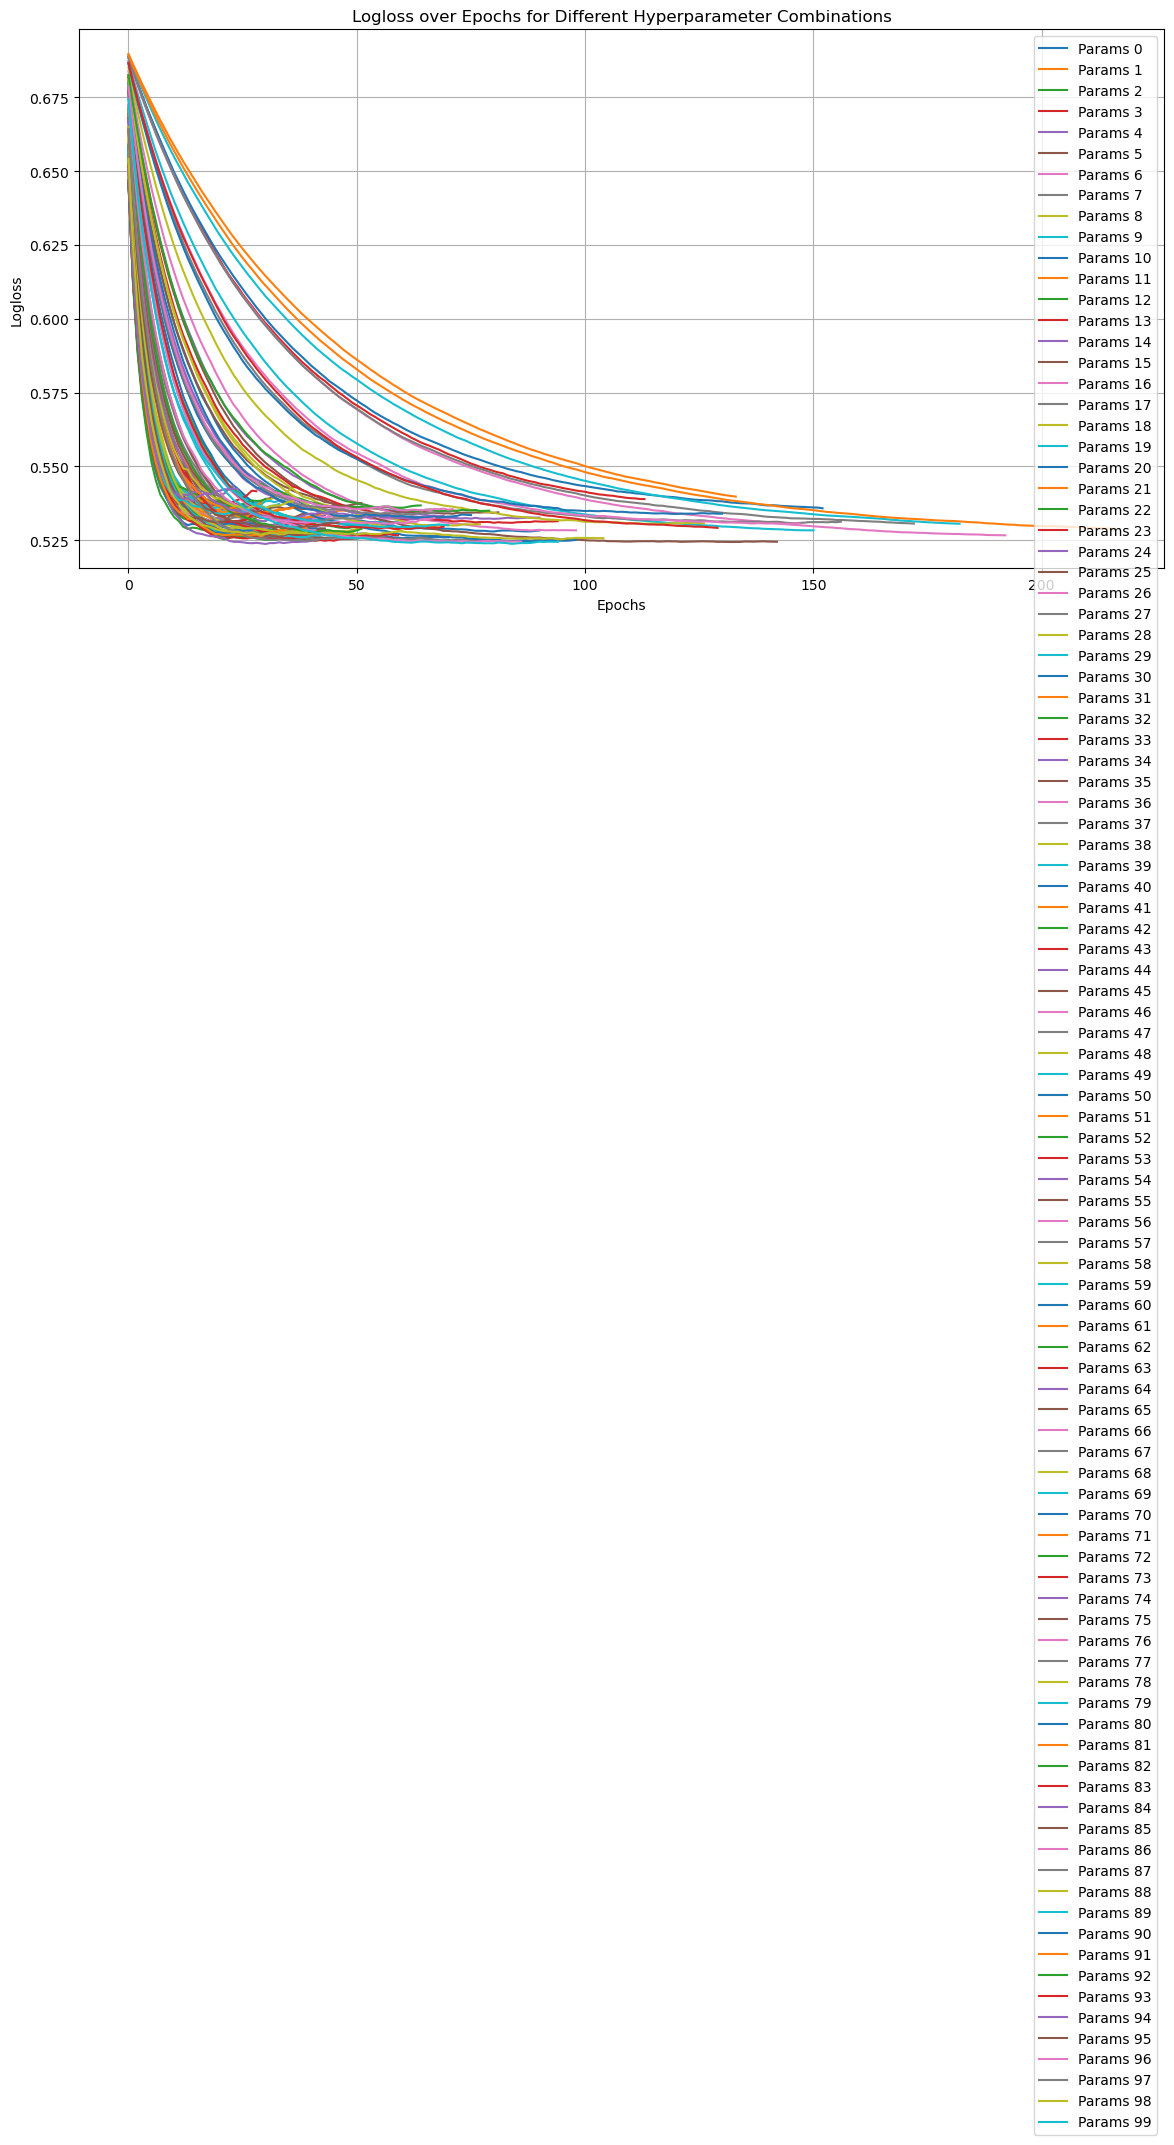

Best model accuracy: 0.7267
Total time taken: 53.10 seconds


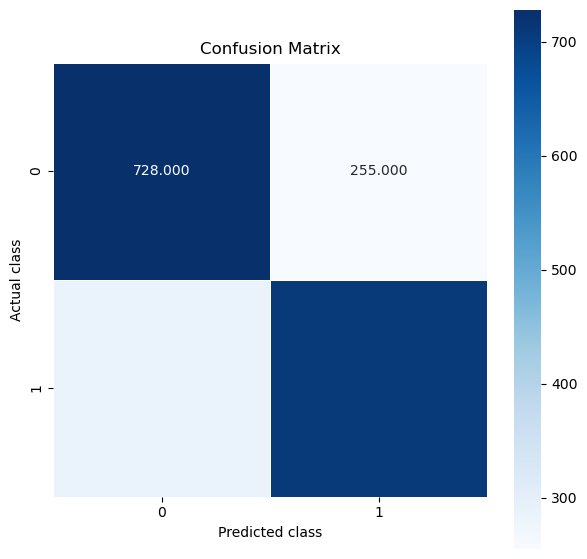

In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 분포 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_lambda': uniform(1, 10),
    'reg_alpha': uniform(0, 5)
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic')

# 랜덤 서치 초기화
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 모델 학습
import time
start_time = time.time()
random_search.fit(X_train, y_train, 
                  eval_set=[(X_valid, y_valid)], 
                  early_stopping_rounds=10, 
                  verbose=True)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {random_search.best_params_}')

# 각 후보 모델의 성능 추적
results = random_search.cv_results_

# 성능 추적 결과 시각화
plt.figure(figsize=(14, 7))
for i, params in enumerate(results['params']):
    model = xgb.XGBClassifier(**params, objective='binary:logistic')
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)
    evals_result = model.evals_result()
    
    # 에폭별 로그 손실 그래프
    plt.plot(evals_result['validation_0']['logloss'], label=f'Params {i}')

plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('Logloss over Epochs for Different Hyperparameter Combinations')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'colsample_bytree': 0.6057573954519023, 'gamma': 0.03482179215207487, 'learning_rate': 0.01920052840435055, 'max_depth': 3, 'n_estimators': 193, 'reg_alpha': 4.277302920055036, 'reg_lambda': 8.036578593800236, 'subsample': 0.78966953163493}
Best model accuracy: 0.7267
Total time taken: 100.65 seconds


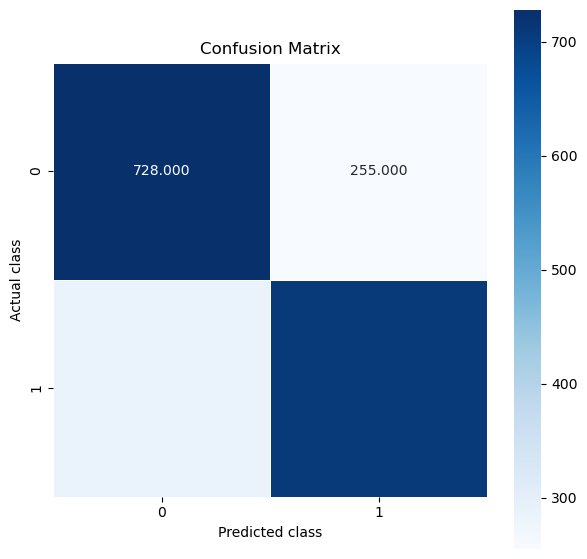

c:\Users\NT551\anaconda3\envs\project\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


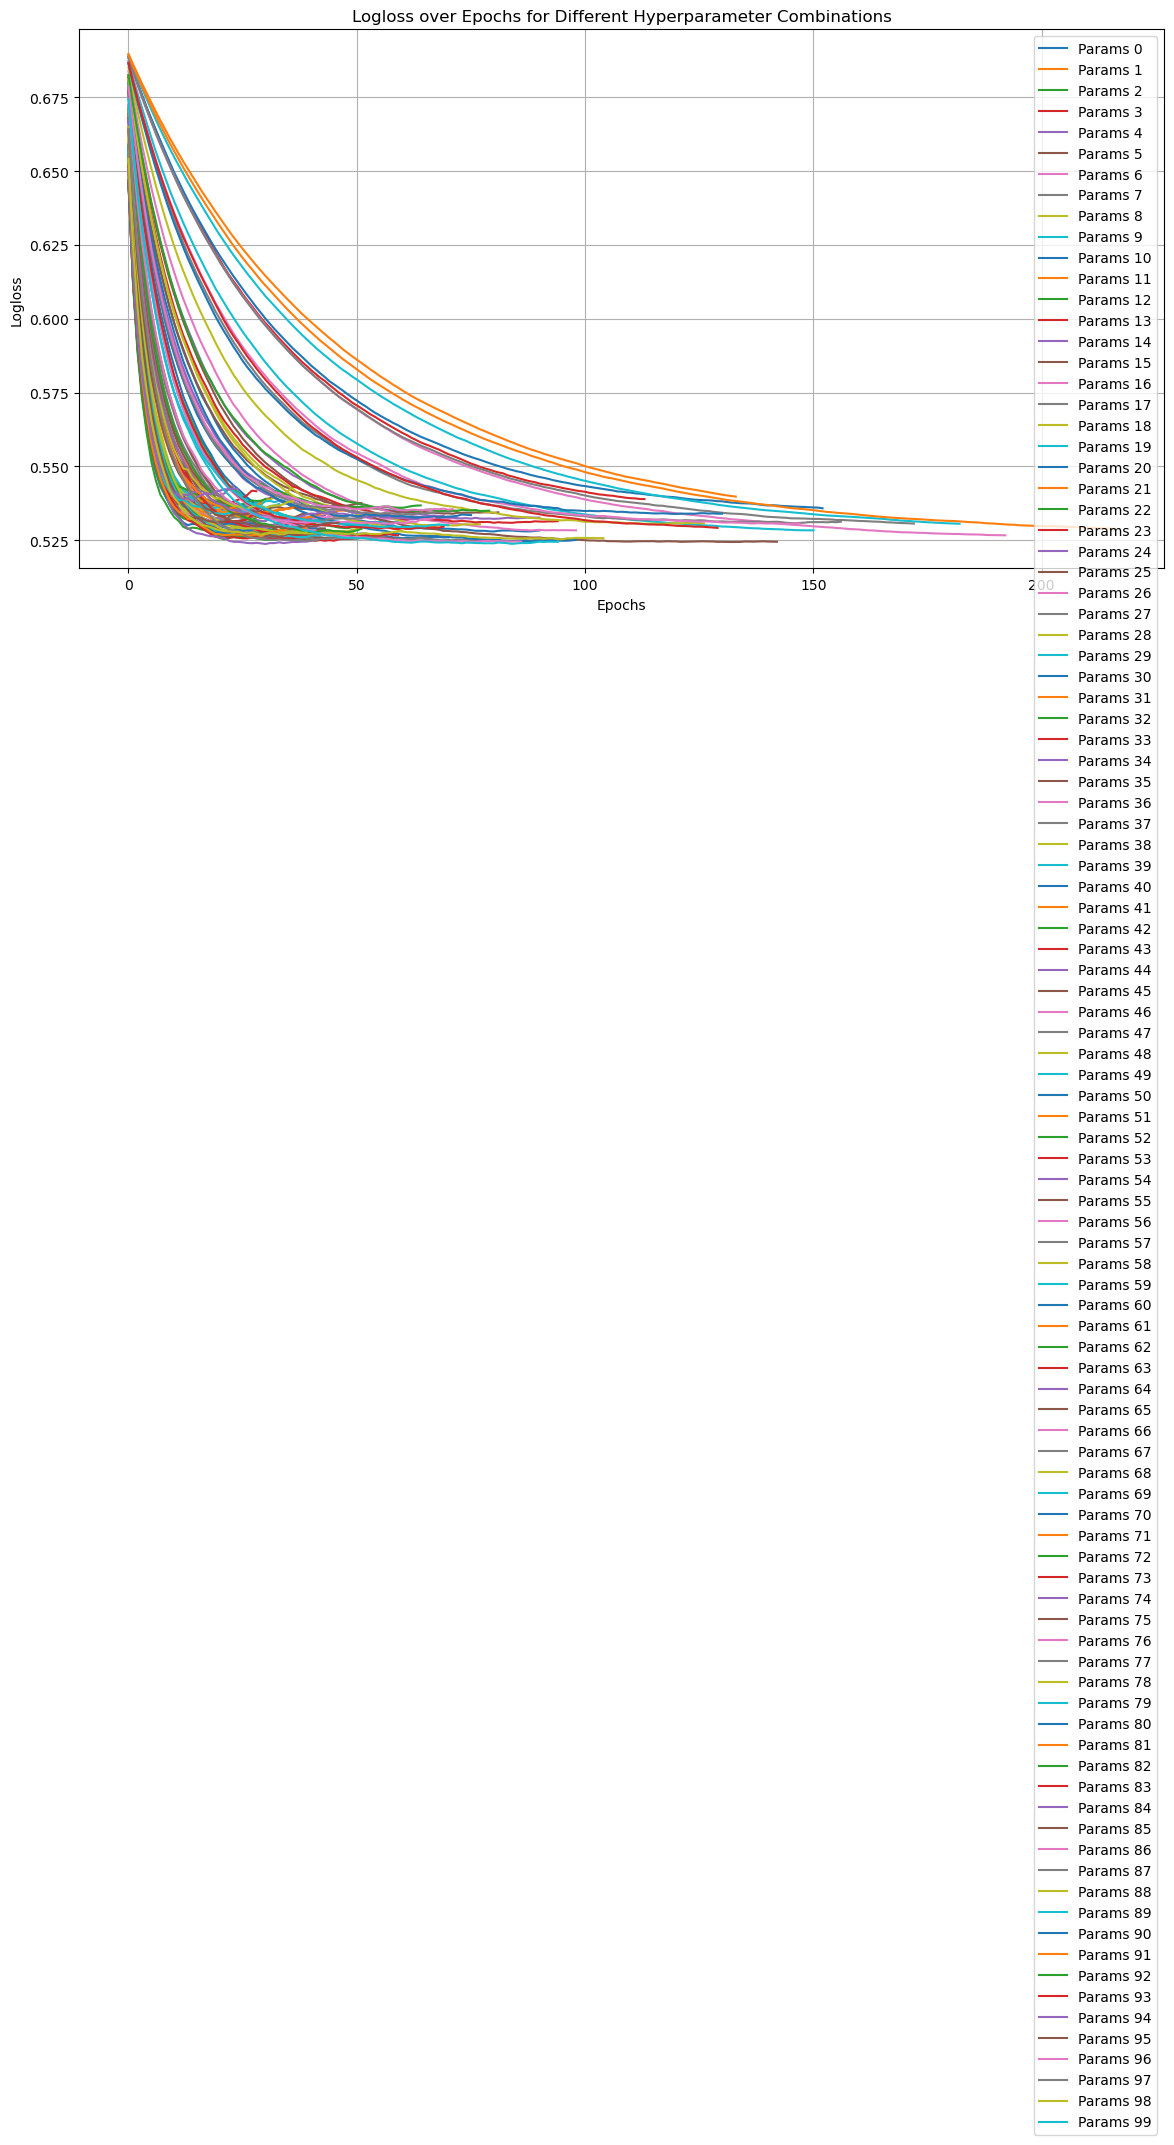

In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
import time

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 분포 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_lambda': uniform(1, 10),
    'reg_alpha': uniform(0, 5)
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Randomized Search 초기화
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 모델 학습
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {random_search.best_params_}')

# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()

# 각 후보 모델의 성능 추적
results = random_search.cv_results_

# 에폭별 로그 손실 그래프 시각화
plt.figure(figsize=(14, 7))
for i, params in enumerate(results['params']):
    model = xgb.XGBClassifier(**params, objective='binary:logistic', eval_metric='logloss')
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)
    evals_result = model.evals_result()
    
    # 에폭별 로그 손실 그래프
    plt.plot(evals_result['validation_0']['logloss'], label=f'Params {i}')

plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('Logloss over Epochs for Different Hyperparameter Combinations')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# colsaple_bytree 값이 0에서 1 사이여야 하는데
# subsample/colsample_bytree(0.6, 1.0) 분포로 설정하여 최대값ㅅ이 1.6으로 넘어가게 설정되어 있었다
# 이로 인해 오류가 발생하여 1.0 -> 0.4 로 바꿨다

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'colsample_bytree': 0.6057573954519023, 'gamma': 0.03482179215207487, 'learning_rate': 0.01920052840435055, 'max_depth': 3, 'n_estimators': 193, 'reg_alpha': 4.277302920055036, 'reg_lambda': 8.036578593800236, 'subsample': 0.78966953163493}
Best model accuracy: 0.7267
Total time taken: 104.19 seconds


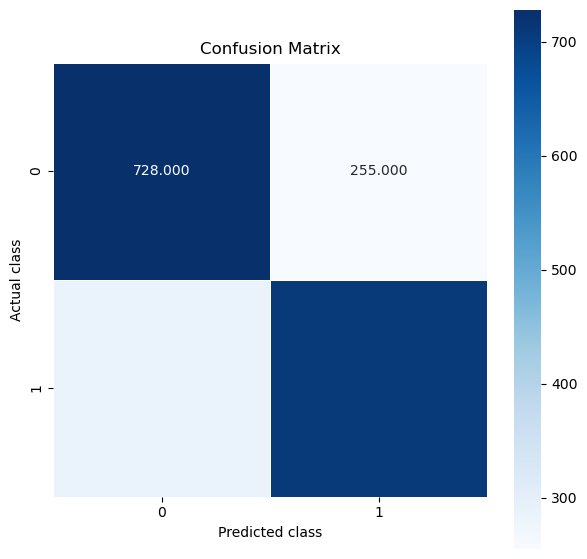

[0]	validation_0-logloss:0.68834
[1]	validation_0-logloss:0.68371
[2]	validation_0-logloss:0.67922
[3]	validation_0-logloss:0.67478
[4]	validation_0-logloss:0.67063
[5]	validation_0-logloss:0.66659
[6]	validation_0-logloss:0.66259
[7]	validation_0-logloss:0.65887
[8]	validation_0-logloss:0.65535
[9]	validation_0-logloss:0.65185
[10]	validation_0-logloss:0.64843
[11]	validation_0-logloss:0.64508
[12]	validation_0-logloss:0.64179
[13]	validation_0-logloss:0.63874
[14]	validation_0-logloss:0.63574
[15]	validation_0-logloss:0.63285
[16]	validation_0-logloss:0.62998
[17]	validation_0-logloss:0.62721
[18]	validation_0-logloss:0.62455
[19]	validation_0-logloss:0.62195
[20]	validation_0-logloss:0.61930
[21]	validation_0-logloss:0.61685
[22]	validation_0-logloss:0.61451
[23]	validation_0-logloss:0.61210
[24]	validation_0-logloss:0.60992
[25]	validation_0-logloss:0.60784
[26]	validation_0-logloss:0.60577
[27]	validation_0-logloss:0.60380
[28]	validation_0-logloss:0.60180
[29]	validation_0-loglos

c:\Users\NT551\anaconda3\envs\project\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.57881
[43]	validation_0-logloss:0.57755
[44]	validation_0-logloss:0.57621
[45]	validation_0-logloss:0.57497
[46]	validation_0-logloss:0.57373
[47]	validation_0-logloss:0.57256
[48]	validation_0-logloss:0.57149
[49]	validation_0-logloss:0.57037
[50]	validation_0-logloss:0.56936
[51]	validation_0-logloss:0.56829
[52]	validation_0-logloss:0.56721
[53]	validation_0-logloss:0.56622
[54]	validation_0-logloss:0.56522
[55]	validation_0-logloss:0.56421
[56]	validation_0-logloss:0.56327
[57]	validation_0-logloss:0.56235
[58]	validation_0-logloss:0.56134
[59]	validation_0-logloss:0.56046
[60]	validation_0-logloss:0.55956
[61]	validation_0-logloss:0.55881
[62]	validation_0-logloss:0.55793
[63]	validation_0-logloss:0.55713
[64]	validation_0-logloss:0.55641
[65]	validation_0-logloss:0.55571
[66]	validation_0-logloss:0.55502
[67]	validation_0-logloss:0.55437
[68]	validation_0-logloss:0.55378
[69]	validation_0-logloss:0.55313
[70]	validation_0-logloss:0.55245
[71]	validatio

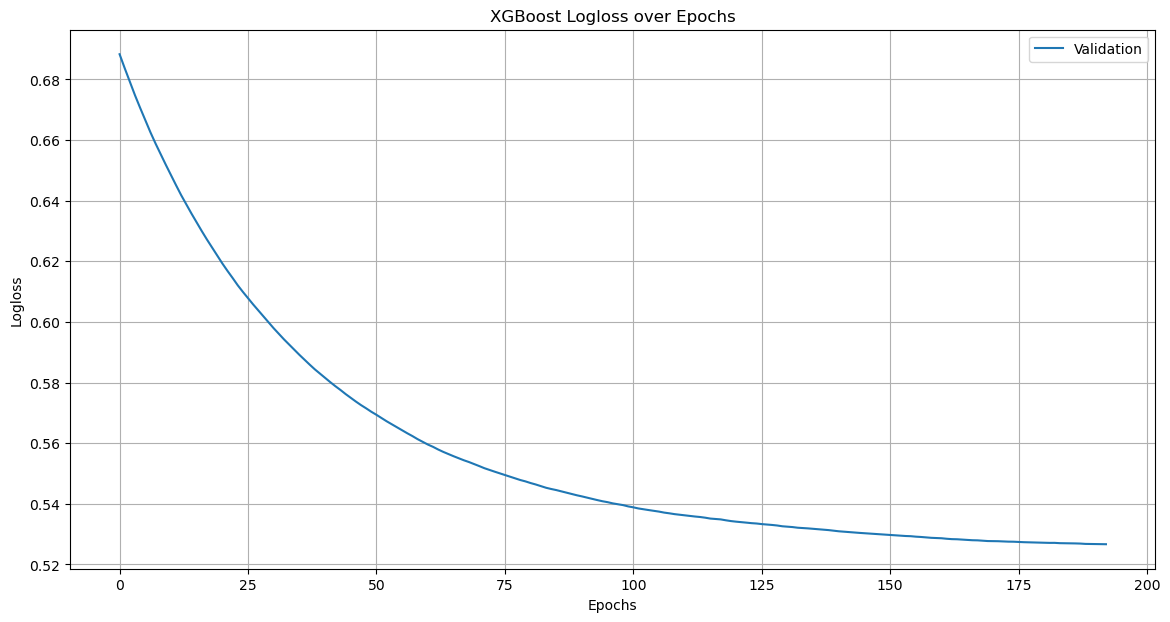

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
import time

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 분포 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_lambda': uniform(1, 10),
    'reg_alpha': uniform(0, 5)
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Randomized Search 초기화
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 모델 학습
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {random_search.best_params_}')

# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()

# 최적 하이퍼파라미터로 학습 및 실시간 에폭 손실 출력
final_model = xgb.XGBClassifier(**random_search.best_params_, objective='binary:logistic', eval_metric='logloss')

evals = [(X_valid, y_valid)]
final_model.fit(
    X_train, y_train,
    eval_set=evals,
    early_stopping_rounds=10,
    verbose=True  # 에폭별로 로그를 출력
)

# 학습 과정 시각화
evals_result = final_model.evals_result()

epochs = len(evals_result['validation_0']['logloss'])
x_axis = range(0, epochs)

# 로그 손실 시각화
plt.figure(figsize=(14, 7))
plt.plot(x_axis, evals_result['validation_0']['logloss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('XGBoost Logloss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
